In [5]:
import os
import pandas as pd

In [6]:
def process_csv_files_in_directory(directory_path):
    """
    Procesa todos los archivos .csv en una carpeta, convierte la columna 'Pac, W' de W a kW 
    y almacena los datos en una lista para cada archivo.
    
    Args:
        directory_path (str): Ruta de la carpeta que contiene los archivos .csv.
    
    Returns:
        dict: Diccionario donde la clave es el nombre del archivo y el valor es la lista de valores en kW.
    """
    results = {}

    # Obtener la lista de archivos .csv en la carpeta
    csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]
    
    for file in csv_files:
        try:
            # Cargar el archivo CSV
            df = pd.read_csv(file)
            
            # Verificar si la columna 'Pac, W' existe
            if 'Pac, W' not in df.columns:
                print(f"Advertencia: El archivo {os.path.basename(file)} no contiene la columna 'Pdc, W'.")
                continue
            
            # Convertir la columna 'Pac, W' de W a kW
            kw_values = df['Pdc, W'] / 1000  # Conversión a kW
            
            # Guardar la lista de valores en el diccionario
            file_name = os.path.basename(file)
            results[file_name] = kw_values.tolist()
        
        except Exception as e:
            print(f"Error al procesar el archivo {os.path.basename(file)}: {e}")
    
    return results

In [7]:
# Ejemplo de uso
if __name__ == "__main__":
    # Carpeta que contiene los archivos .csv
    directory_path = "/Users/santiagoromero/Documents/Maestria/Trabajo de Grado/Red CNN-LSTM/Files/KWH/Real"
    
    # Procesar los archivos en la carpeta
    results = process_csv_files_in_directory(directory_path)
    
    # Mostrar los resultados
    for file_name, kw_list in results.items():
        print(f"Archivo: {file_name}, Lista de valores en kW: {kw_list[:5]} ... (mostrando los primeros 5 valores)")


Archivo: RP_real_04_04.csv, Lista de valores en kW: [nan, 0.0, 0.0, 0.0, 0.0] ... (mostrando los primeros 5 valores)
Archivo: RP_real_02_04.csv, Lista de valores en kW: [nan, 0.0, 0.0, 0.0, 0.0] ... (mostrando los primeros 5 valores)
Archivo: RP_real_05_04.csv, Lista de valores en kW: [nan, 0.0, 0.0, 0.0, 0.0] ... (mostrando los primeros 5 valores)
Archivo: RP_real_03_04.csv, Lista de valores en kW: [nan, 0.0, 0.0, 0.0, 0.0] ... (mostrando los primeros 5 valores)
Archivo: RP_real_01_04.csv, Lista de valores en kW: [nan, 0.0, 0.0, 0.0, 0.0] ... (mostrando los primeros 5 valores)


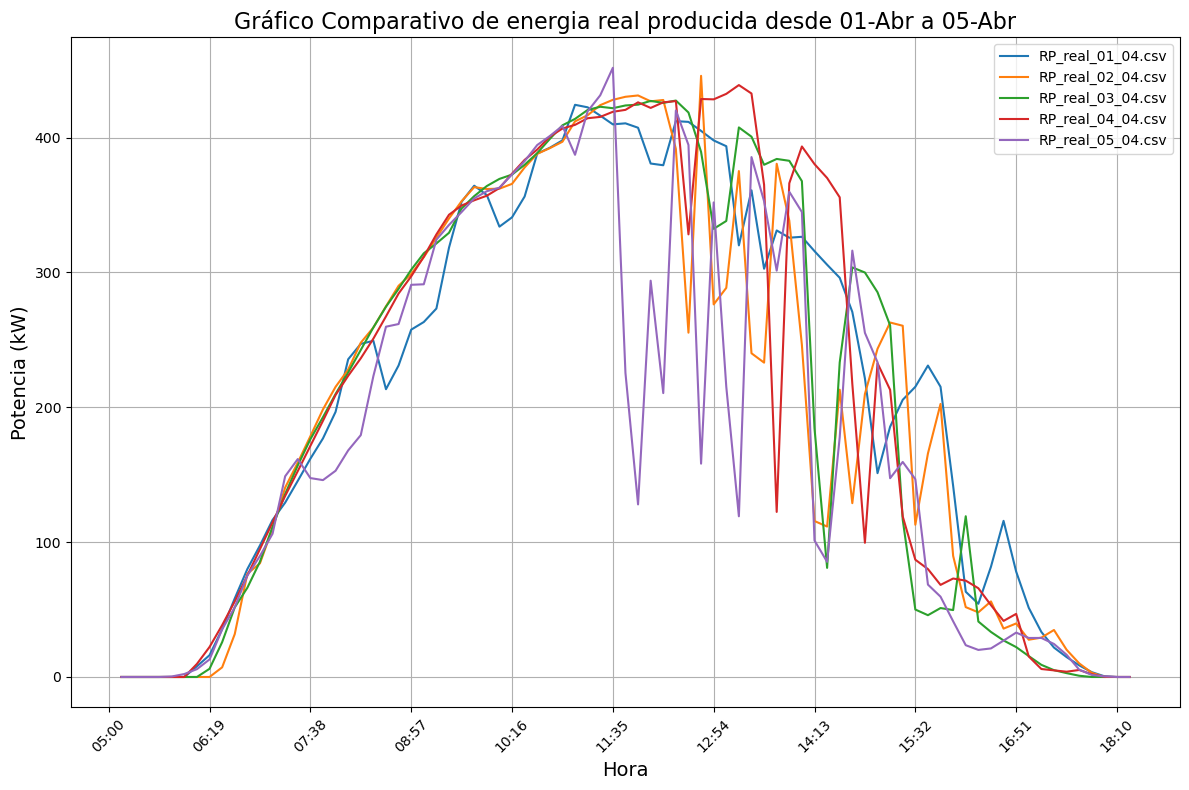

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def generate_time_labels(start_time, end_time, num_points):
    """
    Genera una lista de etiquetas de tiempo equiespaciadas para el eje X.

    Args:
        start_time (str): Hora de inicio en formato 'HH:MM'.
        end_time (str): Hora de fin en formato 'HH:MM'.
        num_points (int): Número total de puntos.

    Returns:
        list: Lista de etiquetas de tiempo como cadenas.
    """
    times = pd.date_range(start=start_time, end=end_time, periods=num_points).strftime('%H:%M')
    return times.tolist()

def plot_all_together_with_time_labels(results):
    """
    Grafica todas las listas en un mismo gráfico con un eje X basado en etiquetas de tiempo
    y con una leyenda ordenada alfabéticamente.

    Args:
        results (dict): Diccionario con los nombres de archivos como claves y listas de valores en kW como valores.
    """
    # Parámetros del tiempo
    start_time = "05:00"
    end_time = "18:20"
    
    # Obtener el número de puntos de la primera lista (se asume que todas las listas tienen la misma longitud)
    num_points = len(next(iter(results.values())))
    time_labels = generate_time_labels(start_time, end_time, num_points)
    
    plt.figure(figsize=(12, 8))  # Configurar tamaño del gráfico
    
    # Ordenar los resultados alfabéticamente por nombre del archivo
    sorted_results = dict(sorted(results.items()))
    
    for file_name, kw_list in sorted_results.items():
        # Graficar cada lista
        plt.plot(kw_list, label=file_name)
    
    # Ajustar etiquetas del eje X
    plt.xticks(ticks=range(0, len(time_labels), max(len(time_labels) // 10, 1)),  # Mostrar 10 etiquetas máximo
               labels=time_labels[::max(len(time_labels) // 10, 1)], rotation=45)
    
    # Personalizar el gráfico
    plt.title('Gráfico Comparativo de energia real producida desde 01-Abr a 05-Abr', fontsize=16)
    plt.xlabel('Hora', fontsize=14)
    plt.ylabel('Potencia (kW)', fontsize=14)
    plt.legend(loc='best')  # Leyenda ordenada
    plt.grid(True)
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso
plot_all_together_with_time_labels(results)


In [9]:
# Ejemplo de uso
if __name__ == "__main__":
    # Carpeta que contiene los archivos .csv
    directory_path = "/Users/santiagoromero/Documents/Maestria/Trabajo de Grado/Red CNN-LSTM/Files/KWH/Predicho"
    
    # Procesar los archivos en la carpeta
    results = process_csv_files_in_directory(directory_path)
    
    # Mostrar los resultados
    for file_name, kw_list in results.items():
        print(f"Archivo: {file_name}, Lista de valores en kW: {kw_list[:5]} ... (mostrando los primeros 5 valores)")


Archivo: RP_pred_04_04.csv, Lista de valores en kW: [nan, 0.0, 0.0, 0.0, 0.0] ... (mostrando los primeros 5 valores)
Archivo: RP_pred_02_04.csv, Lista de valores en kW: [nan, 0.0, 0.0, 0.0, 0.0] ... (mostrando los primeros 5 valores)
Archivo: RP_pred_05_04.csv, Lista de valores en kW: [nan, 0.0, 0.0, 0.0, 0.0] ... (mostrando los primeros 5 valores)
Archivo: RP_pred_01_04.csv, Lista de valores en kW: [nan, 0.0, 0.0, 0.0, 0.0] ... (mostrando los primeros 5 valores)
Archivo: RP_pred_03_04.csv, Lista de valores en kW: [nan, 0.0, 0.0, 0.0, 0.0] ... (mostrando los primeros 5 valores)


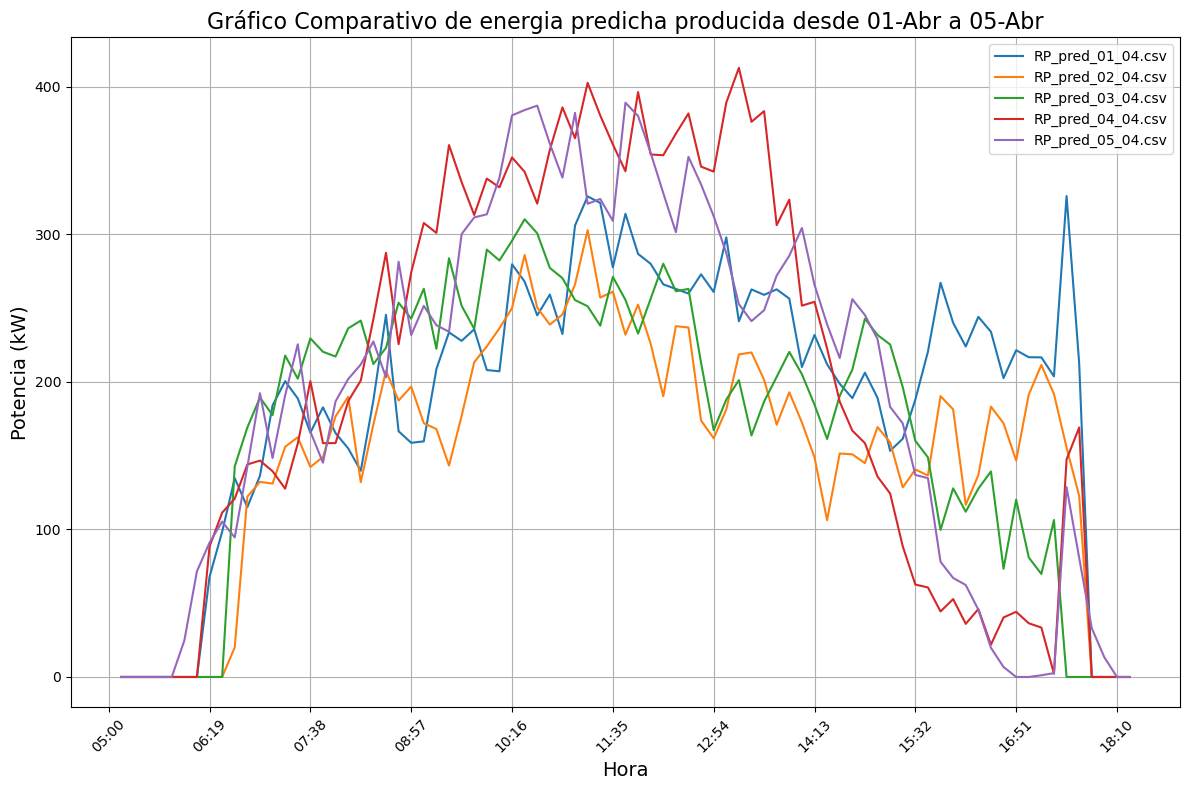

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def generate_time_labels(start_time, end_time, num_points):
    """
    Genera una lista de etiquetas de tiempo equiespaciadas para el eje X.

    Args:
        start_time (str): Hora de inicio en formato 'HH:MM'.
        end_time (str): Hora de fin en formato 'HH:MM'.
        num_points (int): Número total de puntos.

    Returns:
        list: Lista de etiquetas de tiempo como cadenas.
    """
    times = pd.date_range(start=start_time, end=end_time, periods=num_points).strftime('%H:%M')
    return times.tolist()

def plot_all_together_with_time_labels(results):
    """
    Grafica todas las listas en un mismo gráfico con un eje X basado en etiquetas de tiempo
    y con una leyenda ordenada alfabéticamente.

    Args:
        results (dict): Diccionario con los nombres de archivos como claves y listas de valores en kW como valores.
    """
    # Parámetros del tiempo
    start_time = "05:00"
    end_time = "18:20"
    
    # Obtener el número de puntos de la primera lista (se asume que todas las listas tienen la misma longitud)
    num_points = len(next(iter(results.values())))
    time_labels = generate_time_labels(start_time, end_time, num_points)
    
    plt.figure(figsize=(12, 8))  # Configurar tamaño del gráfico
    
    # Ordenar los resultados alfabéticamente por nombre del archivo
    sorted_results = dict(sorted(results.items()))
    
    for file_name, kw_list in sorted_results.items():
        # Graficar cada lista
        plt.plot(kw_list, label=file_name)
    
    # Ajustar etiquetas del eje X
    plt.xticks(ticks=range(0, len(time_labels), max(len(time_labels) // 10, 1)),  # Mostrar 10 etiquetas máximo
               labels=time_labels[::max(len(time_labels) // 10, 1)], rotation=45)
    
    # Personalizar el gráfico
    plt.title('Gráfico Comparativo de energia predicha producida desde 01-Abr a 05-Abr', fontsize=16)
    plt.xlabel('Hora', fontsize=14)
    plt.ylabel('Potencia (kW)', fontsize=14)
    plt.legend(loc='best')  # Leyenda ordenada
    plt.grid(True)
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso
plot_all_together_with_time_labels(results)


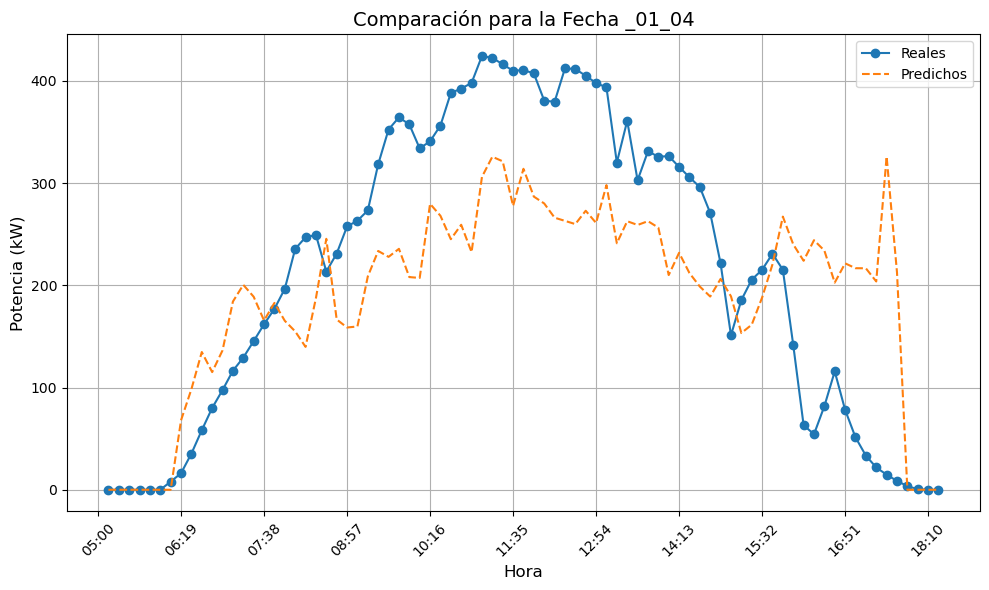

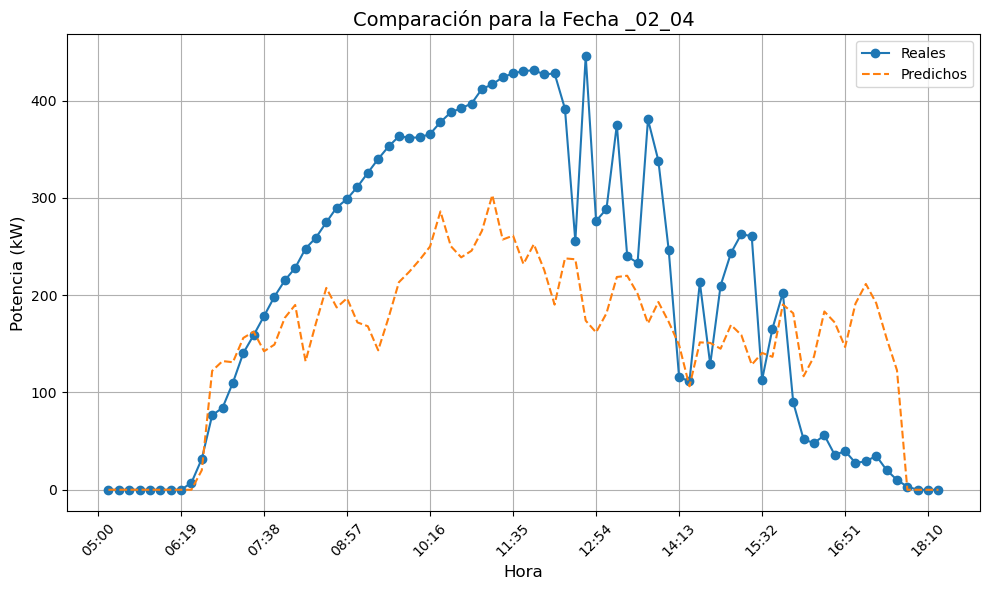

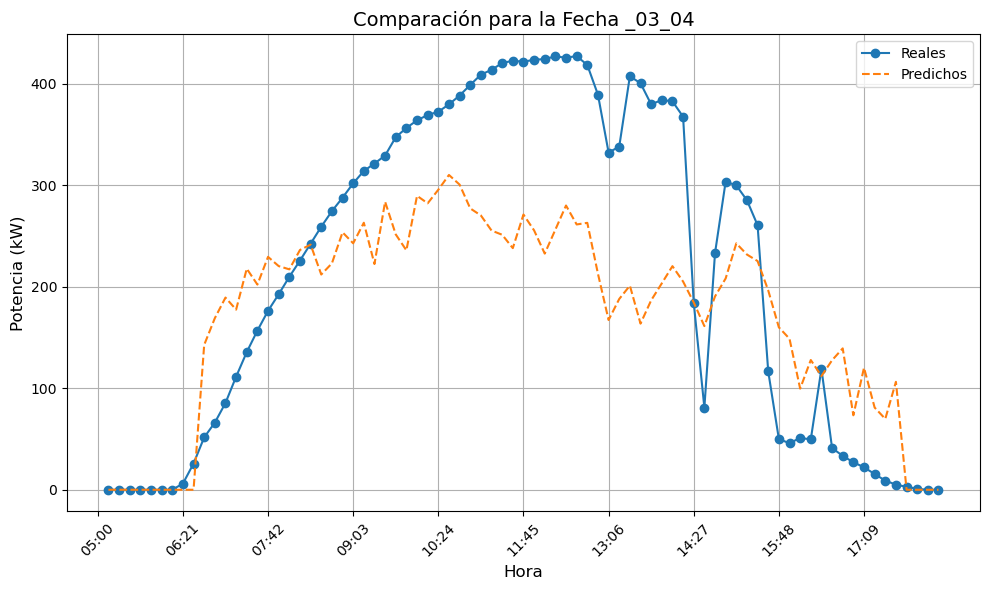

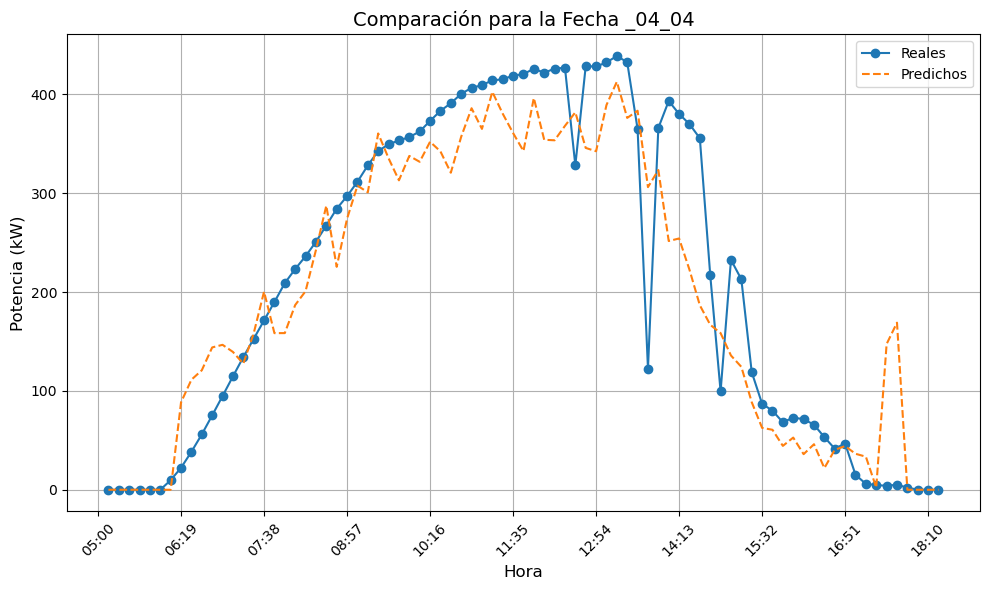

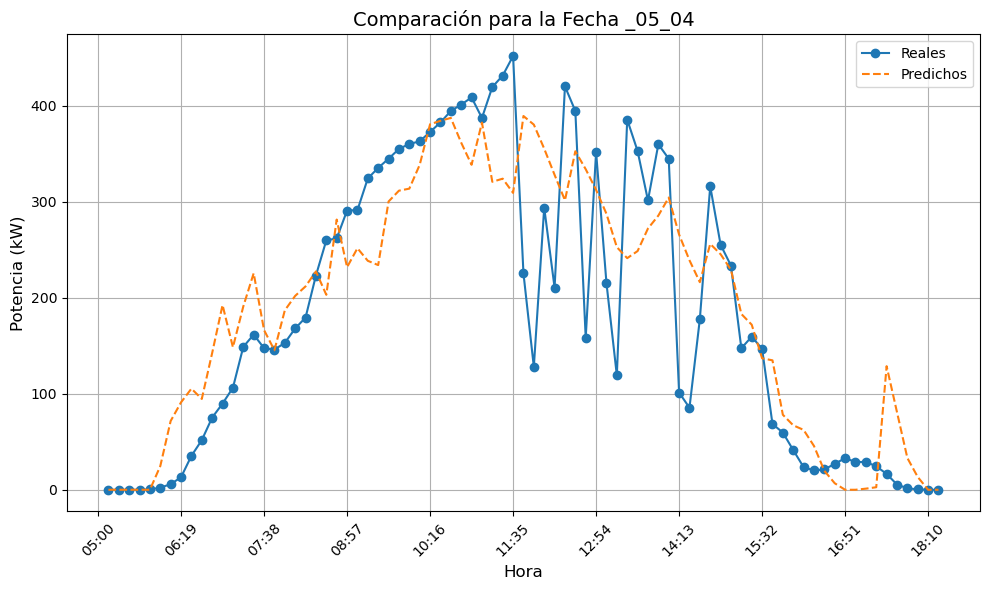

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_date_indicator(file_name):
    """
    Extrae el indicador de fecha desde el nombre del archivo en el formato _DD_MM.

    Args:
        file_name (str): Nombre del archivo.

    Returns:
        str: Indicador de fecha extraído.
    """
    parts = file_name.split('_')
    return f"_{parts[-2]}_{parts[-1].split('.')[0]}"

def load_csv_files_with_dates(directory):
    """
    Carga archivos .csv de un directorio y extrae el indicador de fecha de cada archivo.

    Args:
        directory (str): Directorio que contiene los archivos .csv.

    Returns:
        dict: Diccionario donde la clave es el indicador de fecha y el valor es el DataFrame.
    """
    data = {}
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    for file in csv_files:
        date_indicator = extract_date_indicator(file)
        data[date_indicator] = pd.read_csv(os.path.join(directory, file))
    return data

def generate_time_labels(start_time, end_time, num_points):
    """
    Genera una lista de etiquetas de tiempo equiespaciadas para el eje X.

    Args:
        start_time (str): Hora de inicio en formato 'HH:MM'.
        end_time (str): Hora de fin en formato 'HH:MM'.
        num_points (int): Número total de puntos.

    Returns:
        list: Lista de etiquetas de tiempo como cadenas.
    """
    times = pd.date_range(start=start_time, end=end_time, periods=num_points).strftime('%H:%M')
    return times.tolist()

def plot_comparative_graphs_by_date(real_data_dir, predicted_data_dir, column_name, output_dir=None):
    """
    Genera gráficas comparativas para cada fecha común entre los directorios de reales y predichos.

    Args:
        real_data_dir (str): Directorio que contiene los datos reales.
        predicted_data_dir (str): Directorio que contiene los datos predichos.
        column_name (str): Nombre de la columna a comparar.
        output_dir (str, optional): Directorio para guardar las gráficas. Si es None, solo muestra las gráficas.
    """
    # Cargar los datos de ambos directorios
    real_data = load_csv_files_with_dates(real_data_dir)
    predicted_data = load_csv_files_with_dates(predicted_data_dir)

    # Identificar fechas comunes
    common_dates = set(real_data.keys()) & set(predicted_data.keys())
    if not common_dates:
        print("No se encontraron fechas comunes en ambos directorios.")
        return
    
    for date in sorted(common_dates):  # Asegurar orden por fecha
        try:
            real_values = real_data[date][column_name] / 1000  # Convertir a kW
            predicted_values = predicted_data[date][column_name] / 1000  # Convertir a kW
            
            # Generar etiquetas de tiempo uniformes basadas en el rango de horas
            time_labels = generate_time_labels("05:00", "18:20", len(real_values))

            plt.figure(figsize=(10, 6))
            plt.plot(time_labels, real_values, label="Reales", marker='o')
            plt.plot(time_labels, predicted_values, label="Predichos", linestyle='--')
            
            # Personalizar el gráfico
            plt.title(f'Comparación para la Fecha {date}', fontsize=14)
            plt.xlabel('Hora', fontsize=12)
            plt.ylabel('Potencia (kW)', fontsize=12)
            plt.legend()
            plt.xticks(
                ticks=range(0, len(time_labels), max(len(time_labels) // 10, 1)),  # Mostrar hasta 10 etiquetas
                labels=time_labels[::max(len(time_labels) // 10, 1)], rotation=45
            )
            plt.grid(True)
            plt.tight_layout()
            
            # Guardar o mostrar la gráfica
            if output_dir:
                os.makedirs(output_dir, exist_ok=True)
                plt.savefig(os.path.join(output_dir, f'Comparacion_{date}.png'))
            else:
                plt.show()
        except Exception as e:
            print(f"Error al procesar la fecha {date}: {e}")

# Ejemplo de uso
real_data_directory = "/Users/santiagoromero/Documents/Maestria/Trabajo de Grado/Red CNN-LSTM/Files/KWH/Real"
predicted_data_directory = "/Users/santiagoromero/Documents/Maestria/Trabajo de Grado/Red CNN-LSTM/Files/KWH/Predicho"
column_to_compare = "Pdc, W"  # Nombre de la columna
output_directory = None  # Cambia a None si no deseas guardar las gráficas

plot_comparative_graphs_by_date(real_data_directory, predicted_data_directory, column_to_compare, output_directory)
